# The Competitive Lokta Volterra System


This process describes the dynamics of a population of $N$ interacting species $X_i$ governed by two types of reactions, the species specific replication:

$$
X_i\xrightarrow{\alpha_i}2X_i
$$

and the inter- and intra species competition:

$$
X_i+X_j\xrightarrow{\beta_{ij}/\Omega}2X_j
$$

that quantifies at which rate species $j$ removes species $i$. The parameter $\Omega$ represents an overall system size and ensures that the rates $\beta_{ij}$ are of the order of unity.

Ignoring fluctuations, when the system size $\Omega$ is very large, the ODE of the abundances of species $i$ is given by

$$
\dot n_i=n_i\left(\alpha_i -\frac{1}{\Omega} \sum_j \beta_{ij} n_j \right)
$$

One can reexpress this in terms of the density variables $x_i=n_i/\Omega$ to get

$$
\dot x_i=x_i\left(\alpha_i - \sum_j \beta_{ij} x_j \right).
$$



## The diffusion approximation

In the limit of large population size $N$ the dynamics of the competitive Lotka Volterra process can be approximated by a diffusion process:

$$
dn_{i}=n_{i}\left(\alpha_{i}-\left\langle \beta_{i}\right\rangle \right)dt+\sqrt{n_{i}}\left(\sqrt{\alpha_{i}+\left\langle \beta_{i}\right\rangle }\right)dW_{i}\qquad\left\langle \beta_{i}\right\rangle =\frac{1}{\Omega}\sum_{j}\beta_{ij}n_{j}=\sum_{j}\beta_{ij}x_{j}
$$

where $dW_{i}$ are independent increments of the Wiener process.

In [1]:
import numpy as np
from math import isinf
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from stopro import competitive_lotka_volterra as clv
from math import inf
from math import isinf
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

## Simple 3 Species System with identical replication rate and random interactions

In [2]:
n0 = np.array([50,50,50])
omega = 1000
alpha = np.array([1,1,1]) 
beta =  np.random.rand(3,3)+0.5
T = 10 
dt = 0.05
samples = 10 

res = clv(T,n0,alpha,beta,omega,samples=samples)
res_da = clv(T,n0,alpha,beta,omega,samples=samples,diffusion_approximation=True,dt=dt)

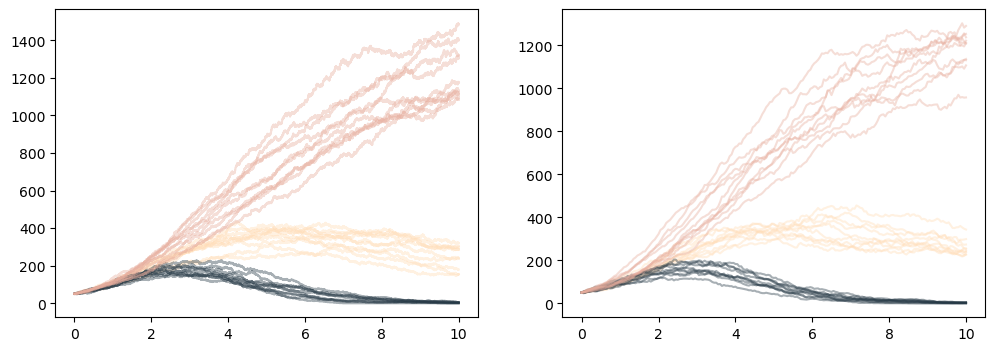

In [3]:
fig,ax = plt.subplots(1,2,figsize=[12,4])

for i in range(len(n0)):
    
    for s in range(samples):
        t = res[s][0]
        X = np.array(res[s][1]).T    
        ax[0].plot(t,X[i],color='C'+str(i),alpha=0.4)
    
    for s in range(samples):
        t = res_da[s][0]
        X = np.array(res_da[s][1]).T    
        ax[1].plot(t,X[i],color='C'+str(i),alpha=0.4)

## Here's a system expressed in density and compared to the system of infinite system size (```system_size=inf```)

In [10]:
x0 = np.array([0.2,0.1,0.5])
omega = 300
alpha = np.array([1.5,1.25,1]) # replication rates of each species
beta = 0.2*np.random.rand(3,3)+1.0
T = 10 # integration time
dt = 0.05
samples = 5 # number of samples
# here are the realizations of the moran process
res = clv(T,x0,alpha,beta,omega,samples=samples,normalize=True)
res_da = clv(T,x0,alpha,beta,omega,samples=samples,normalize=True,diffusion_approximation=True,dt=dt)
ode = clv(T,x0,alpha,beta,inf,dt=dt,normalize=True)

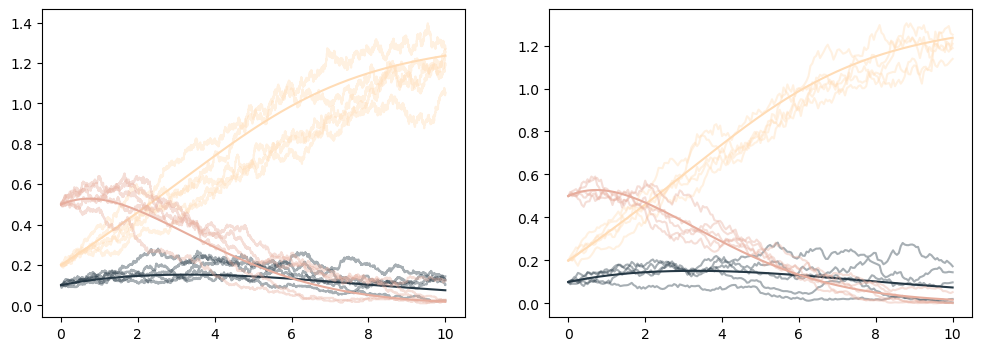

In [11]:
fig,ax = plt.subplots(1,2,figsize=[12,4])
t0 = ode[0]
X0 = np.array(ode[1]).T

for i in range(len(x0)):
    ax[0].plot(t0,X0[i],color='C'+str(i))
    for s in range(samples):
        t = res[s][0]
        X = np.array(res[s][1]).T    
        ax[0].plot(t,X[i],color='C'+str(i),alpha=0.4)
    ax[1].plot(t0,X0[i],color='C'+str(i))
    for s in range(samples):
        t = res_da[s][0]
        X = np.array(res_da[s][1]).T    
        ax[1].plot(t,X[i],color='C'+str(i),alpha=0.4)